In [1]:
import sys
sys.path.append('../..')
sys.path.append('../data')
sys.path.append('../../helper_code')

from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import numpy as np
import pandas as pd
from IPython.display import display
import copy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from helper_code.custom_kernel import *
from helper_code.util import *

In [2]:
input_dataset = ['c', 'c_lexi', 'c_lexi_nd', 'CE', 'CE_lexi', 'CE_lexi_nd', 'CSE', 'CSE_lexi', 'CSE_lexi_nd']
dataset_dict = {}

for data in input_dataset:
    dataset_dict[data] = pd.read_csv(f'../data/coronene_training_data/{data}.csv')

delta_total_energy = pd.read_csv(f'../data/coronene_training_data/delta_total_energy.csv')
delta_delta_total_energy = pd.read_csv(f'../data/coronene_training_data/delta_delta_total_energy.csv')

In [3]:
model_collection = {}
performance_summary = {}

## Baseline ##

In [10]:
X = dataset_dict['c'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_Gaussian_delta'] = model
performance_summary['ANM_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,2322.083151,46.118926
2,128,2025.929082,13.00216
3,256,1910.417181,5.191908
4,512,1848.789238,6.467236
5,1024,1765.338166,7.008218
6,2048,1660.596187,17.018644


In [11]:
X = dataset_dict['c_lexi'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_Gaussian_delta'] = model
performance_summary['ANM_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,1435.396108,26.235736
2,128,1290.727524,11.837338
3,256,1206.031426,4.536711
4,512,1163.494159,4.433648
5,1024,1130.639551,4.972413
6,2048,1086.01135,9.565169


### CM ###

In [6]:
CM_rep = pd.read_csv("../data/coronene_training_data/CM_rep.csv")

X = CM_rep.to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 0.00011806857533747571, 'gamma': 0.00010582969605609149, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['CM'] = model
performance_summary['CM'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,1050.559698,20.588206
2,128,809.538849,11.850073
3,256,689.76739,5.907872
4,512,637.621164,2.338049
5,1024,602.764584,3.233059
6,2048,575.777034,9.27524


### MBDF ###

In [ ]:
MBDF_rep = np.genfromtxt("../data/coronene_training_data/MBDF.csv", delimiter=',')

X = CM_rep.to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 0.00011806857533747571, 'gamma': 0.00010582969605609149, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['CM'] = model
performance_summary['CM'] = model_performance

display(model_performance)

## CE with Gaussian ##

In [6]:
X = dataset_dict['CE_lexi'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CE_lexi_Gaussian_delta'] = model
performance_summary['ANM_CE_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,1429.960347,26.301362
2,128,1279.11012,11.835571
3,256,1183.056693,4.335191
4,512,1120.96614,4.915474
5,1024,1056.157739,5.232611
6,2048,968.470759,7.773471


## CSE with Gaussian ##

In [12]:
X = dataset_dict['CSE'].to_numpy()
y = delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_Gaussian'] = model
performance_summary['ANM_CSE_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,55.350294,1.912755
2,128,44.425299,0.422063
3,256,40.526336,0.306236
4,512,37.779552,0.202503
5,1024,35.314846,0.148165
6,2048,33.134935,0.361095


In [13]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_Gaussian'] = model
performance_summary['ANM_CSE_lexi_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,54.893334,0.498404
2,128,43.88468,0.463466
3,256,40.546514,0.284975
4,512,37.587013,0.228472
5,1024,35.053687,0.149522
6,2048,32.95756,0.336174


In [7]:
X = dataset_dict['CSE'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_Gaussian_delta'] = model
performance_summary['ANM_CSE_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,54.666116,1.930799
2,128,44.122647,0.430607
3,256,40.285701,0.298247
4,512,37.654622,0.201863
5,1024,35.298823,0.145509
6,2048,33.190847,0.364882


In [4]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_Gaussian_delta'] = model
performance_summary['ANM_CSE_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,54.130252,0.652736
2,128,43.560631,0.478574
3,256,40.325913,0.274173
4,512,37.479214,0.225005
5,1024,35.026728,0.151969
6,2048,32.990988,0.343056


In [8]:
display(dataset_dict['CSE_lexi'])

,coord0,coord1,coord2,coord3,coord4,coord5,coord6,coord7,coord8,coord9,...,coord14,coord15,coord16,coord17,coord18,coord19,coord20,coord21,coord22,coord23
0,-2.691756e-03,0.473053,0.288149,0.052612,0.020798,1.170634e+00,3.950494e-01,4.317273e+00,4.000051e+00,0.012664,...,0.773610,1.159791,2.720857,4.459345e+00,5.444429e-06,8.242306e-01,0.032765,0.936411,3.707708,2.290102
1,-2.774554e-04,0.241912,0.210898,0.036281,0.855944,3.201522e-02,9.885275e-02,6.874323e-02,2.631785e-02,0.304385,...,0.146267,0.891609,2.518435,1.239186e-01,3.244736e-01,2.300467e+00,0.254246,0.001034,2.583153,0.524791
2,-3.448772e-04,1.348980,1.595940,0.201349,0.002293,5.237768e-01,3.953577e-01,3.881670e-02,1.449280e-01,0.608476,...,1.629642,0.079686,3.641744,4.459758e+00,1.292993e+00,2.819110e+00,0.091414,2.330354,0.980209,2.942181
3,-1.240928e-03,0.443685,0.105469,1.015039,0.148998,8.152757e-01,9.903154e-02,1.596734e+00,1.135163e+00,1.524272,...,0.789620,0.046134,0.732160,1.238438e-01,3.217343e-01,5.695481e-01,0.293537,1.775518,1.451725,0.181355
4,-1.814514e-03,0.077506,0.103481,0.638687,0.100010,5.185013e-01,3.950232e-01,3.978822e+00,1.626517e-01,1.558675,...,1.911302,0.044259,2.604946,1.982033e+00,3.259892e-01,6.246401e-01,0.375348,0.183821,3.733225,0.031687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,-2.357732e-13,0.215155,0.005351,0.050070,0.167058,3.686947e-09,6.707763e-10,8.389569e-11,3.118045e-09,0.050654,...,0.290666,0.490495,0.086743,1.168434e-10,8.990878e-10,5.580382e-11,0.041446,0.396685,0.014050,0.000025
2396,-1.255206e-04,0.053394,1.732954,6.976014,0.417649,8.222235e-01,8.890970e-01,1.179700e+00,2.402909e-01,0.003636,...,0.813813,0.197762,0.773919,1.240073e-01,5.179508e+00,1.416684e-04,0.223068,0.434213,1.155887,1.030259
2397,-4.438298e-03,0.128224,1.145849,1.268891,0.489447,5.132914e-01,3.952490e-01,6.032765e-01,7.014829e-01,0.002527,...,0.576204,2.704854,0.682013,1.076653e-09,5.199684e+00,1.129571e+00,0.035537,0.013574,4.085881,0.813680
2398,-8.621439e-05,0.004372,0.003890,0.000021,0.290958,1.310653e-01,3.950388e-01,6.340419e-01,1.432363e-02,1.088219,...,0.440218,0.097078,0.088609,4.955421e-01,3.234875e-01,1.912073e+00,0.199865,0.006789,0.059100,0.270914


In [9]:
display(dataset_dict['CSE'])

,coord0,coord1,coord2,coord3,coord4,coord5,coord6,coord7,coord8,coord9,...,coord14,coord15,coord16,coord17,coord18,coord19,coord20,coord21,coord22,coord23
0,-2.691838e-03,0.757369,0.003896,0.000502,0.072785,1.170500e+00,3.955695e-01,4.317283e+00,3.999479e+00,2.603839,...,0.799541,1.686473,2.194118,4.460012e+00,6.435813e-06,8.241233e-01,0.962589,0.006704,0.303101,5.694303
1,-2.773470e-04,0.371240,0.081576,0.457912,0.434301,3.206155e-02,9.889016e-02,6.875763e-02,2.638158e-02,0.226756,...,0.509912,0.224429,3.185526,1.238377e-01,3.252463e-01,2.300535e+00,0.152126,0.103166,2.762828,0.344394
2,-3.448676e-04,2.231457,0.713297,0.040624,0.162973,5.238850e-01,3.956282e-01,3.881049e-02,1.450518e-01,0.058873,...,0.478658,2.437739,1.283597,4.458447e+00,1.293882e+00,2.819044e+00,0.420345,2.001561,1.277527,2.645166
3,-1.240942e-03,0.443687,0.105474,1.015016,0.148973,8.153995e-01,9.890176e-02,1.596734e+00,1.135164e+00,1.524296,...,0.789615,0.046137,0.732104,1.238356e-01,3.217379e-01,5.695635e-01,0.293517,1.775495,1.451783,0.181359
4,-1.814484e-03,0.174521,0.006431,0.015837,0.722701,5.186936e-01,3.953215e-01,3.978949e+00,1.633145e-01,5.391170,...,2.556740,2.258782,0.390447,1.982239e+00,3.264224e-01,6.246638e-01,0.004229,0.554877,0.659181,3.105109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,-6.813766e-14,0.028420,0.192083,0.058619,0.158512,5.822401e-09,2.948919e-10,1.141779e-10,1.742082e-12,0.028884,...,0.448351,0.366327,0.210920,7.016265e-11,1.407653e-10,1.078121e-10,0.196835,0.241287,0.004044,0.010030
2396,-1.255510e-04,0.505074,1.281366,3.200333,4.193509,8.214128e-01,8.898506e-01,1.179477e+00,2.402434e-01,1.356141,...,0.003097,0.934933,0.036659,1.237449e-01,5.179392e+00,1.404706e-04,0.369237,0.288130,1.893667,0.292724
2397,-4.438270e-03,0.944448,0.329628,1.195817,0.562652,5.131849e-01,3.952710e-01,6.033094e-01,7.012622e-01,0.032006,...,0.996881,1.926442,1.460387,5.782342e-10,5.199482e+00,1.129531e+00,0.048279,0.000846,3.588855,1.310853
2398,-8.624613e-05,0.008259,0.000004,0.231454,0.059581,1.309803e-01,3.955177e-01,6.339975e-01,1.430267e-02,3.463965,...,0.073271,0.137340,0.048365,4.953689e-01,3.235323e-01,1.912010e+00,0.016196,0.190529,0.330101,0.000002


In [5]:
# X = dataset_dict['CSE_lexi_nd'].to_numpy()
# y = delta_delta_total_energy.to_numpy()

# best_params = {'alpha': 1.5563301230102018e-07, 'gamma': 2.545548038867767e-06, 'kernel': 'rbf'}
# model = KernelRidge(**best_params)

# columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
# model_performance = pd.DataFrame(columns=columns)

# training_size = [2**i for i in range(6, 12)]
# num_trials = 10

# with warnings.catch_warnings():
#     for index, num_training_sample in enumerate(training_size):
#         warnings.filterwarnings("ignore")
#         index = index + 1
#         average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
#         model_performance.at[index, 'training size'] = num_training_sample
#         model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
#         model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

# model_collection['ANM_CSE_lexi_nd_Gaussian_delta'] = model
# performance_summary['ANM_CSE_lexi_nd_Gaussian_delta'] = model_performance

# display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,60.020776,1.747465
2,128,43.923337,0.557093
3,256,39.599448,0.342031
4,512,36.338692,0.240197
5,1024,33.736501,0.153197
6,2048,31.564115,0.354111


## CSE with Extended Gaussian ##

In [10]:
# X = dataset_dict['CSE_lexi']
# y = delta_delta_total_energy

# best_params = {'alpha': 5.948688011403127e-11, 'beta': 2.8505311767038538e-12, 'epsilon': 4.727331943165293e-07, 'gamma': 5.298346661430054e-10}
# model = KernelRidge(kernel='precomputed', alpha=best_params['alpha'])

# columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
# model_performance = pd.DataFrame(columns=columns)

# training_size = [2**i for i in range(6, 12)]
# num_trials = 10

# with warnings.catch_warnings():
#     for index, num_training_sample in enumerate(training_size):
#         warnings.filterwarnings("ignore")
#         index = index + 1
#         average_error, std_dev_error = evaluate_performance_vectorized_kernel(model, X, y, num_training_sample, num_trials, vectorized_extended_gaussian_kernel, best_params)
#         model_performance.at[index, 'training size'] = num_training_sample
#         model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
#         model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

# model_collection['ANM_CSE_lexi_ex_Gaussian_delta'] = model
# performance_summary['ANM_CSE_lexi_ex_Gaussian_delta'] = model_performance

# display(model_performance)

## Learning Curve ##

In [11]:
print(performance_summary.keys())

dict_keys(['ANM_Gaussian', 'ANM_Gaussian_delta', 'CM', 'ANM_CE_lexi_Gaussian_delta', 'ANM_CSE_lexi_Gaussian_delta', 'ANM_CSE_lexi_nd_Gaussian_delta'])


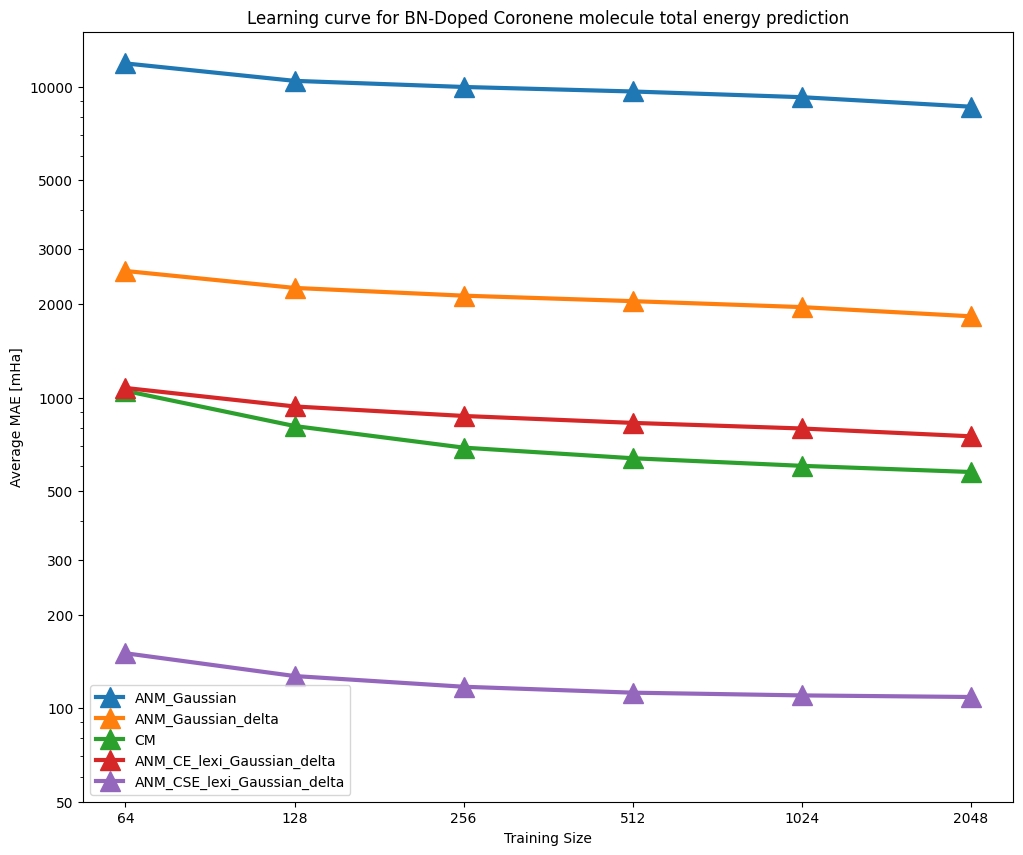

In [14]:
# performance_summary.pop("ANM_CSE_lexi_nd_Gaussian_delta")

plt.figure(figsize=(12, 10))

x = performance_summary['ANM_Gaussian']['training size']
y_values = {}
for key, df in performance_summary.items():
    y_values[key] = df['average MAE (mHa)']

linewidth = 3
markersize = 15

for key, y_value in y_values.items():
    plt.plot(x, y_value, label=key, marker='^', linestyle='-', linewidth=linewidth, markersize=markersize)

plt.title('Learning curve for BN-Doped Coronene molecule total energy prediction')
plt.xlabel('Training Size')
plt.ylabel('Average MAE [mHa]')
plt.legend()

plt.xscale('log', base=2)
plt.yscale('log', base=10)
xticks = [2**i for i in range(6, 12)]
yticks = [50, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 10000]
plt.xticks(xticks, labels = xticks)
plt.yticks(yticks, labels = yticks)

plt.savefig('../graph/[Coronene] [2.0] Learning curve for BN-Doped Coronene molecule total energy prediction.png', dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
x = performance_summary['ANM_Gaussian']['training size']
y = performance_summary['ANM_CSE_lexi_Gaussian_delta']['average MAE (mHa)']
plt.plot(x, y, label=key, marker='^', linestyle='-', linewidth=linewidth, markersize=markersize)

plt.title('Learning curve for BN-Doped Coronene molecule total energy prediction')
plt.xlabel('Training Size')
plt.ylabel('Average MAE [mHa]')
plt.legend()

plt.xscale('log', base=2)
plt.yscale('log', base=10)
xticks = [2**i for i in range(6, 12)]
yticks = [100, 200]
plt.xticks(xticks, labels = xticks)
plt.yticks(yticks, labels = yticks)

plt.show()